In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# follow_01_data 불러오기

data1 = pd.read_csv("C:/Users/user/Desktop/서울과기대/2022/데이터마이닝/follow_01_data.csv")

In [3]:
# follow_01_data 중 사용할 feature만 걸러내기

data1_1 = data1[['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T01_HTN']]

In [4]:
# follow_02_data 불러오기

data2 = pd.read_csv("C:/Users/user/Desktop/서울과기대/2022/데이터마이닝/follow_02_data.csv")

In [5]:
# follow_02_data 중 사용할 feature만 걸러내기

data2_1 = data2[['T00_ID', 'T02_HTN']]

In [6]:
# ID를 기준으로 두 데이터 자료 합치기

df = pd.merge(data1_1, data2_1)

In [7]:
# T01HTN = T02HTN = 2인 행 제거
df1 = df.drop(index= df[(df['T01_HTN']==1) & (df['T02_HTN']==2)].index)

# T01HTN 열 제거
df2 = df1.drop('T01_HTN', axis='columns')

# 해당없음 77777을 0으로 convert
replace_column=['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T02_HTN']

for col in replace_column:
    df2[col].replace(77777.0,0,inplace=True)
    
# Yes or no가 1 또는 2를 0 또는 1로 convert
categorical=['T00_SEX','T01_EXER','T01_FMFHT','T01_FMMHT','T01_FMFDM','T01_FMMDM', 'T02_HTN']
df2[categorical]=df2[categorical].replace({1.0:0,1:0,2.0:1,2:1})

# 미상, 무응답, 미측정 99999가 포함된 행 제거
mask = df2[['T00_ID', 'T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0', 'T02_HTN']].isin([99999.0])

df3 = df2[~mask]

df4 = df3.dropna()

# 조사안함 66666가 포함된 값은 평균값으로 대체 'T01_PULSE', 'T01_HBA1C', 'T01_INS0'
df5 = df4.replace(66666.0, np.NAN)

df5.loc[df5['T01_PULSE'] != df5['T01_PULSE'], 'T01_PULSE'] = df5['T01_PULSE'].mean()
df5.loc[df5['T01_HBA1C'] != df5['T01_HBA1C'], 'T01_HBA1C'] = df5['T01_HBA1C'].mean()
df5.loc[df5['T01_INS0'] != df5['T01_INS0'], 'T01_INS0'] = df5['T01_INS0'].mean()

In [8]:
#df4['T00_ID'].value_counts()
#df4['T00_SEX'].value_counts()
#df4['T01_AGE'].value_counts()
#####df4['T01_DRINK'].value_counts()
#df4['T01_DRDU'].value_counts()
#####df4['T01_SMOKE'].value_counts()
#df4['T01_SMDU'].value_counts()
#df4['T01_EXER'].value_counts()
#df4['T01_FMFHT'].value_counts()
#df4['T01_FMMHT'].value_counts()
#df4['T01_FMFDM'].value_counts()
#df4['T01_FMMDM'].value_counts()
#df4['T01_HEIGHT'].value_counts()
#df4['T01_WEIGHT'].value_counts()
#df4['T01_WAIST'].value_counts()
#df4['T01_HIP'].value_counts()
###df4['T01_PULSE'].value_counts()
#df4['T01_SBP'].value_counts()
#df4['T01_DBP'].value_counts()
###df4['T01_HBA1C'].value_counts()
#df4['T01_GLU0'].value_counts()
#df4['T01_CREATININE'].value_counts()
#df4['T01_AST'].value_counts()
#df4['T01_ALT'].value_counts()
#df4['T01_TCHL'].value_counts()
#df4['T01_HDL'].value_counts()
#df4['T01_TG'].value_counts()
###df4['T01_INS0'].value_counts()
#df4['T02_HTN'].value_counts()

In [9]:
df5

df5.to_csv("sample3.csv")

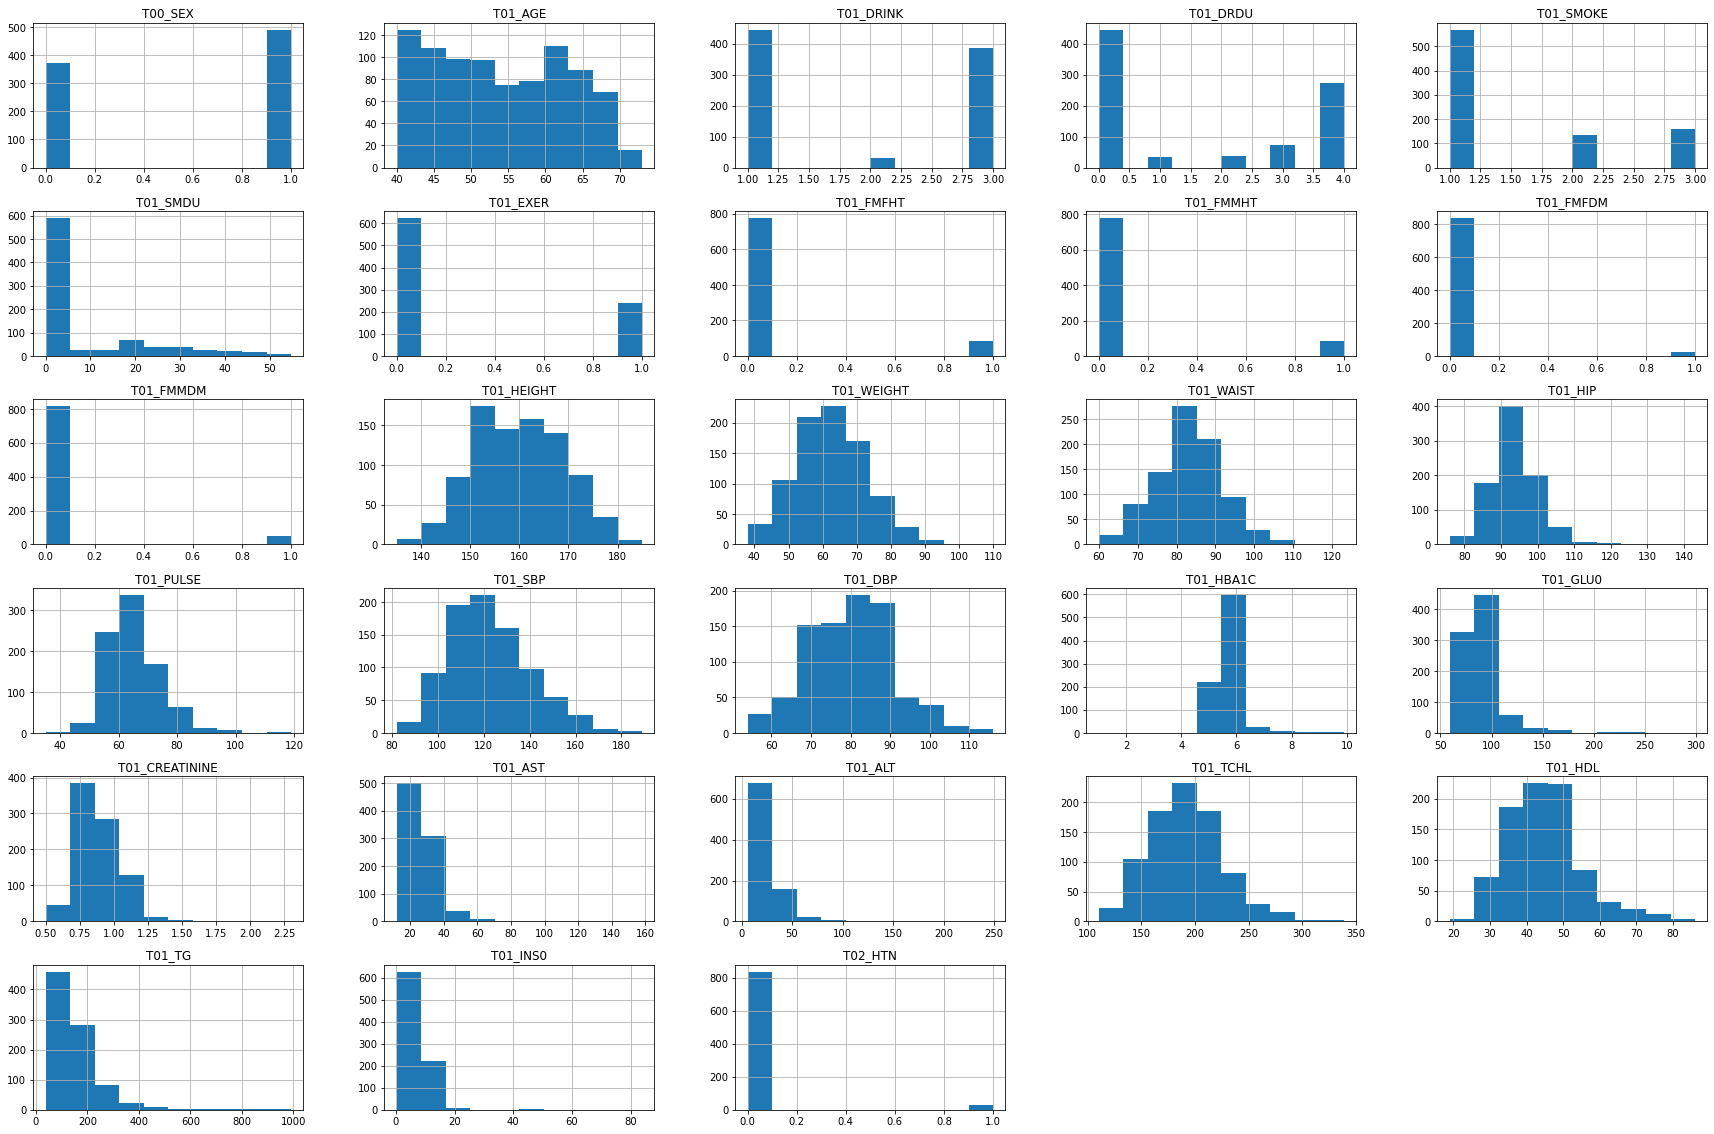

In [13]:
h = df5.iloc[1:,:].hist(figsize=(30,20))

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df5[['T00_SEX', 'T01_AGE', 'T01_DRINK', 'T01_DRDU', 'T01_SMOKE', 'T01_SMDU', 'T01_EXER', 'T01_FMFHT', 'T01_FMMHT',
             'T01_FMFDM', 'T01_FMMDM', 'T01_HEIGHT', 'T01_WEIGHT', 'T01_WAIST', 'T01_HIP', 'T01_PULSE', 'T01_SBP', 'T01_DBP',
              'T01_HBA1C', 'T01_GLU0', 'T01_CREATININE', 'T01_AST', 'T01_ALT', 'T01_TCHL', 'T01_HDL', 'T01_TG', 'T01_INS0']], df5['T02_HTN'], random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(648, 27) (648,) (216, 27) (216,)


## knn with over sampling

In [95]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [96]:
sm = SMOTE(random_state=42, sampling_strategy=0.5)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [97]:
print(X_sm.shape, y_sm.shape)

(939, 27) (939,)


### scaling

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_sm)

In [99]:
X_train_scaled.shape

(939, 27)

In [100]:
print(X_train_scaled.shape, y_train.shape, X_test.shape, y_test.shape)

(939, 27) (648,) (216, 27) (216,)


In [101]:
import mglearn
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [102]:
#df5['T02_HTN'].value_counts()

In [103]:
kmeans = KMeans(n_clusters= 2)
kmeans.fit(X_sm)
print(kmeans.cluster_centers_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[[4.96240602e-01 5.46829574e+01 1.90183744e+00 1.62473461e+00
  1.54903806e+00 8.33113584e+00 2.45614035e-01 9.64912281e-02
  7.01754386e-02 2.25563910e-02 3.63408521e-02 1.58566416e+02
  6.28095238e+01 8.40293052e+01 9.36549462e+01 6.56473627e+01
  1.26352130e+02 8.14949875e+01 5.57727508e+00 8.86465593e+01
  8.77540165e-01 2.72030075e+01 2.45639098e+01 1.85236842e+02
  4.58283208e+01 1.24119319e+02 8.06767458e+00]
 [3.82978723e-01 5.36099291e+01 2.06841086e+00 1.93534916e+00
  1.63548686e+00 8.48734478e+00 1.63120567e-01 9.21985816e-02
  1.77304965e-01 1.41843972e-02 2.12765957e-02 1.60943262e+02
  6.93758865e+01 8.86002831e+01 9.59821640e+01 6.50541427e+01
  1.31354610e+02 8.72198582e+01 5.93663013e+00 9.52072901e+01
  9.28333884e-01 3.00496454e+01 3.34397163e+01 2.08794326e+02
  3.68014184e+01 3.14118179e+02 9.11788009e+00]]


In [104]:
print(scaler.inverse_transform(kmeans.cluster_centers_))
assignments_X_train = kmeans.labels_
print(assignments_X_train)

[[4.96240602e-01 1.84453759e+03 4.80367487e+00 6.49893845e+00
  4.09807612e+00 4.56546244e+02 2.45614035e-01 9.64912281e-02
  7.01754386e-02 2.25563910e-02 3.63408521e-02 8.06332080e+03
  4.56028571e+03 5.35384623e+03 6.35088139e+03 5.54937847e+03
  1.36016779e+04 5.10668922e+03 5.06377482e+01 2.13341742e+04
  2.07957230e+00 3.98363910e+03 5.97503008e+03 3.84540263e+04
  3.08949749e+03 1.18323711e+05 6.75464362e+02]
 [3.82978723e-01 1.80912766e+03 5.13682173e+00 7.74139664e+00
  4.27097373e+00 4.65106494e+02 1.63120567e-01 9.21985816e-02
  1.77304965e-01 1.41843972e-02 2.12765957e-02 8.18216312e+03
  5.03306383e+03 5.64181783e+03 6.50680499e+03 5.49954799e+03
  1.41369433e+04 5.46163121e+03 5.38360082e+01 2.29087496e+04
  2.17100099e+00 4.39924823e+03 8.13185106e+03 4.33304255e+04
  2.48469504e+03 2.99392625e+05 7.63366564e+02]]
[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 

In [105]:
knn = kmeans.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91       209
         1.0       0.06      0.29      0.10         7

    accuracy                           0.83       216
   macro avg       0.52      0.57      0.50       216
weighted avg       0.94      0.83      0.88       216



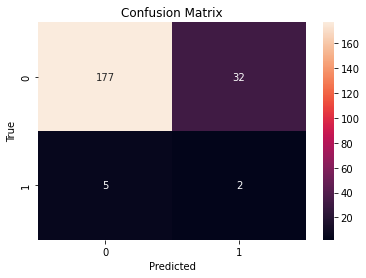

In [106]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, knn))

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0.5, 1.0, 'K-Means Inertia')

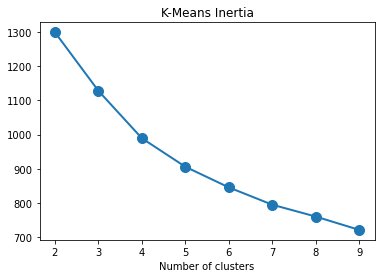

In [28]:
from sklearn.metrics import silhouette_score

inertia = [] 
sil_scores = []

for n_clusters in range(2,10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_train_scaled, cluster_labels))

plt.plot(range(2,10), inertia, marker='o', lw=2, ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")

Text(0.5, 1.0, 'Silhouette Score')

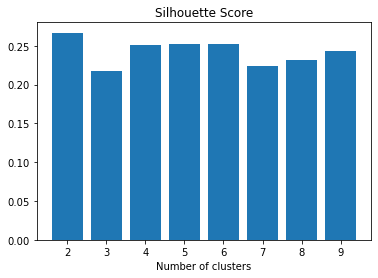

In [29]:
plt.bar(range(2,10), sil_scores, )
plt.xlabel("Number of clusters")
plt.title("Silhouette Score")